In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_csv(r'C:\Users\akash\OneDrive\Desktop\DataScience\CodeCaves\Spam_Detection\dataset\emails.csv')

In [86]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [87]:
df.shape

(5728, 2)

In [88]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [89]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [91]:
df.duplicated().sum()

33

In [92]:
df=df.drop_duplicates(keep='first')

In [93]:
df.duplicated().sum()

0

In [94]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

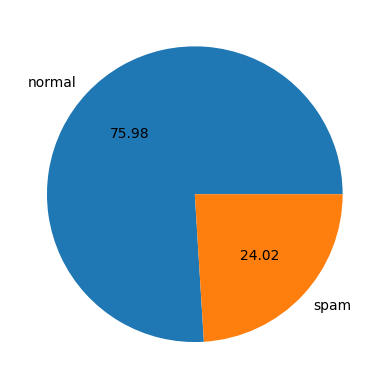

In [95]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(),labels=['normal','spam'],autopct="%0.2f")
plt.show()

In [96]:
import nltk

In [97]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
df['Num_Characters']=df['text'].apply(len)

In [99]:
df.head()

,text,spam,Num_Characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [100]:
df['Num_Words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [101]:
df.head()

,text,spam,Num_Characters,Num_Words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [102]:
df['Num_Sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [103]:
df.head()

,text,spam,Num_Characters,Num_Words,Num_Sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [104]:
df[['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [105]:
df[df['spam']==0][['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [106]:
df[df['spam']==1][['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [107]:
numerical_df = df.select_dtypes(include=['number'])

In [108]:
corr_matrix = numerical_df.corr()

In [109]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _"

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

In [ ]:
if numerical_df.empty:
    print("No numerical columns to correlate.")
else:
    
    corr_matrix = numerical_df.corr()

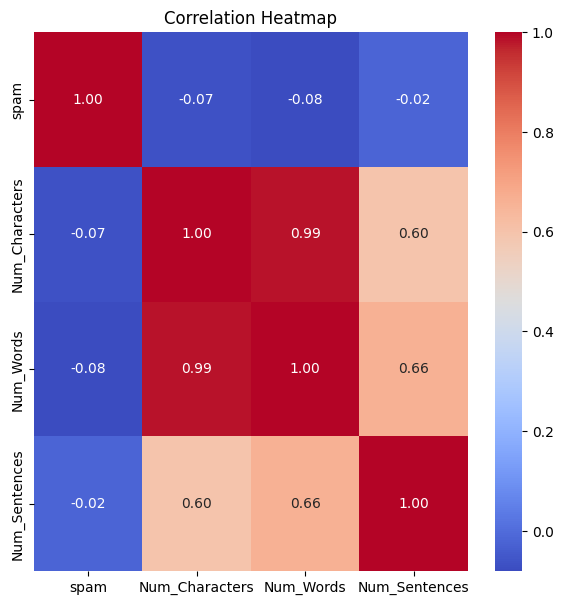

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [119]:
def trasnform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y= []
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()

    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [124]:
trasnform_text('I LOVED THE WATCHING MOVIES')

'love watch movi'

In [118]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [122]:
df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [126]:
df['transformed_text']=df['text'].apply(trasnform_text)

In [127]:
df.head()

,text,spam,Num_Characters,Num_Words,Num_Sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [137]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [138]:
spam_wc=wc.generate(df[df['spam']==1]['transformed_text'].str.cat(sep=" "))

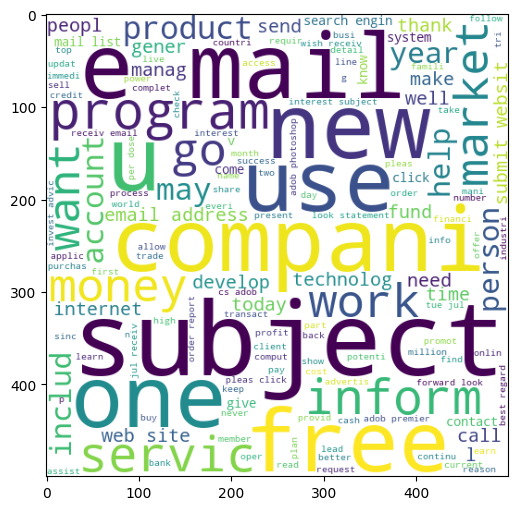

In [141]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [142]:
normal_wc=wc.generate(df[df['spam']==0]['transformed_text'].str.cat(sep=" "))

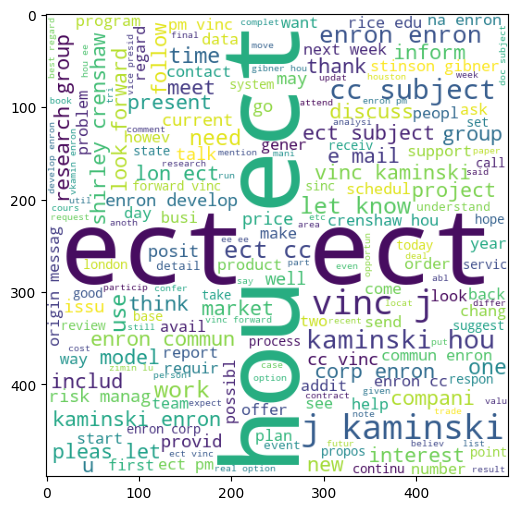

In [144]:
plt.figure(figsize=(15,6))
plt.imshow(normal_wc)

In [147]:
spam_corpus = []
for msg in df[df['spam']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [149]:
len(spam_corpus)


174630

In [155]:
from collections import Counter

pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,subject,1577
1,compani,1065
2,com,1000
3,1,952
4,mail,917
5,busi,897
6,email,865
7,inform,818
8,receiv,727
9,e,701


In [242]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [243]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [244]:
X.shape

(5695, 3000)

In [245]:
y = df['spam'].values

In [246]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [247]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [248]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [249]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [250]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95171202809482
[[837  12]
 [ 43 247]]
0.9536679536679536


In [251]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9850746268656716
[[846   3]
 [ 14 276]]
0.989247311827957


In [252]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429323968393327
[[785  64]
 [  1 289]]
0.8186968838526912


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [254]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [255]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [256]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [257]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.990342405618964, 0.9929328621908127)

In [258]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.990342405618964
Precision -  0.9929328621908127
For  KN
Accuracy -  0.9771729587357331
Precision -  0.9782608695652174
For  NB
Accuracy -  0.9850746268656716
Precision -  0.989247311827957
For  DT
Accuracy -  0.9236172080772608
Precision -  0.8048048048048048
For  LR
Accuracy -  0.971027216856892
Precision -  0.9706959706959707
For  RF
Accuracy -  0.9824407374890255
Precision -  0.9927007299270073
For  AdaBoost
Accuracy -  0.9692712906057945
Precision -  0.967032967032967
For  BgC
Accuracy -  0.9657594381035997
Precision -  0.9403508771929825
For  ETC
Accuracy -  0.9833187006145742
Precision -  0.9927272727272727
For  GBDT
Accuracy -  0.9561018437225637
Precision -  0.9651162790697675
For  xgb
Accuracy -  0.9885864793678666
Precision -  0.9632107023411371


In [264]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [265]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.990342,0.992933
8,ETC,0.983319,0.992727
5,RF,0.982441,0.992701
2,NB,0.985075,0.989247
1,KN,0.977173,0.978261
4,LR,0.971027,0.970696
6,AdaBoost,0.969271,0.967033
9,GBDT,0.956102,0.965116
10,xgb,0.988586,0.963211
7,BgC,0.965759,0.940351


In [266]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [267]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.990342
1,ETC,Accuracy,0.983319
2,RF,Accuracy,0.982441
3,NB,Accuracy,0.985075
4,KN,Accuracy,0.977173
5,LR,Accuracy,0.971027
6,AdaBoost,Accuracy,0.969271
7,GBDT,Accuracy,0.956102
8,xgb,Accuracy,0.988586
9,BgC,Accuracy,0.965759


In [268]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [269]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [270]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [271]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.990342405618964
Precision 0.9929328621908127


In [272]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [273]:
from sklearn.ensemble import StackingClassifier

In [274]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [275]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.990342405618964
Precision 0.9860627177700348


In [276]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))